# Basic Network Analysis with NetworkX
In this demo we use networkx package to read/write a network, and generate fundamental network statistics e.g. degree ditribution, 

In [1]:
import networkx as nx 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# we can use in-built graph generator to create sample graphs based on different graph model
G = nx.complete_graph(50)   # this will create a completely connected graph with 50 nodes

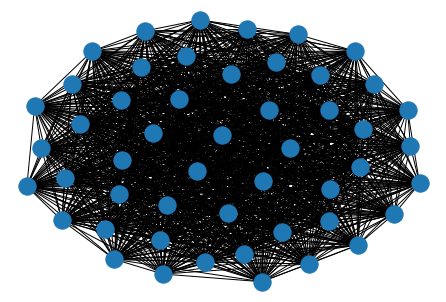

In [3]:
# plot the graph
nx.draw(G)

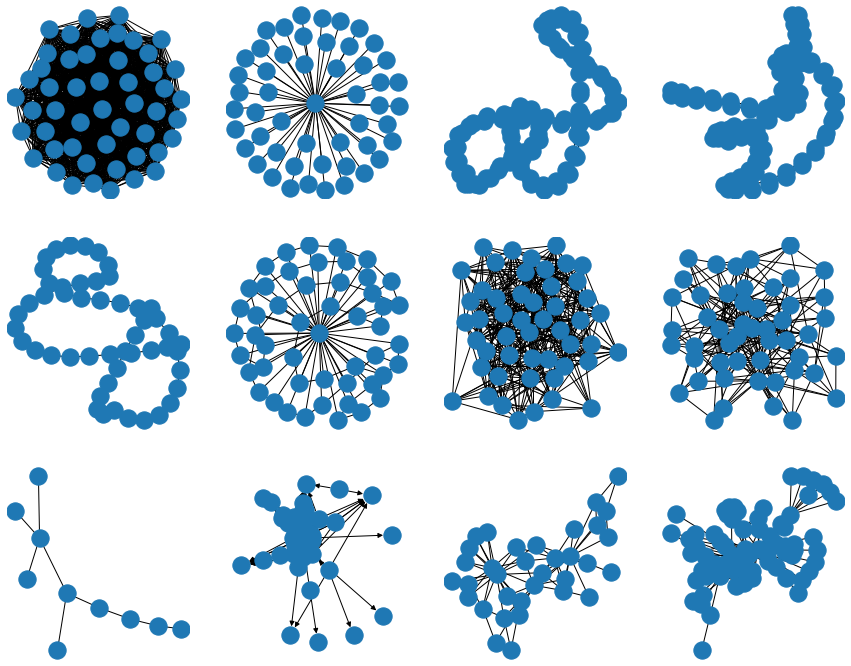

In [6]:
# for demo purpose we plot a few other network types
fig, ax = plt.subplots(3, 4, figsize=(15,12))
G = nx.scale_free_graph(50)
nx.draw(nx.complete_graph(50), ax=ax[0,0])
nx.draw(nx.star_graph(50), ax=ax[0,1])
nx.draw(nx.circular_ladder_graph(50), ax=ax[0,2])
nx.draw(nx.ladder_graph(50), ax=ax[0,3])

nx.draw(nx.path_graph(50), ax=ax[1,0])
nx.draw(nx.wheel_graph(50), ax=ax[1,1])
nx.draw(nx.erdos_renyi_graph(50, 0.3), ax=ax[1,2])
nx.draw(nx.barabasi_albert_graph(50, 5), ax=ax[1,3])

nx.draw(nx.random_powerlaw_tree(10), ax=ax[2,0])
nx.draw(nx.scale_free_graph(50), ax=ax[2,1])
nx.draw(nx.karate_club_graph(), ax=ax[2,2])
nx.draw(nx.les_miserables_graph(), ax=ax[2,3])




## Network Statistics 
Calculate basic network statistics

In [7]:
# import an edgelist as a weighted directed graph
filepath = r"data/sample.edgelist"
G = nx.read_edgelist(filepath, create_using=nx.DiGraph,data=(('weight', int),), delimiter=' ')

This is a fairly large network

In [8]:
# here we calculate some network-level statistics to describe the network
# node / edge count
node_count = len(G.nodes)
edge_count = len(G.edges)
# calculate network density
graph_density = nx.density(G)
# average clustering coefficient
graph_avg_clustering_coef = nx.average_clustering(G)
# average neighbour degree
graph_avg_neighbour_deg = nx.average_neighbor_degree(G)
# k-nearest-neighbour
knn = nx.k_nearest_neighbors(G)
# average shortest path
graph_avg_shortest_path = nx.average_shortest_path_length(G)


In [9]:

print(f"The network has {node_count} nodes, {edge_count} edges, with average density of {graph_density}.\nAverage clustering coefficient = {graph_avg_clustering_coef}\nAverage shortest path length = {graph_avg_shortest_path}")

The network has 4973 nodes, 164340 edges, with average density of 0.0066465106264091585.
Average clustering coefficient = 0.24049292942122183
Average shortest path length = 1.1610522242474608


Many more network statistics are node-based or edge-based, i.e. the statistics describe individual node/edge in the network. For example, KNN, or average degree of nearest neighbours of k-degree nodes, is used to understand degree correlation and graph assortativity. By plotting KNN against k, we can understand if k-degree nodes tend to connect with nodes of similar degrees.

In [10]:
knn_df = pd.DataFrame.from_dict(knn,orient='index',columns=['KNN'])
knn_df.sort_index(inplace=True)
knn_df.head()

KNN
1  0.000000
2  0.500000
3  1.610329
4  4.929104
5  6.413699

Text(0.5, 1.0, 'Knn(k)')

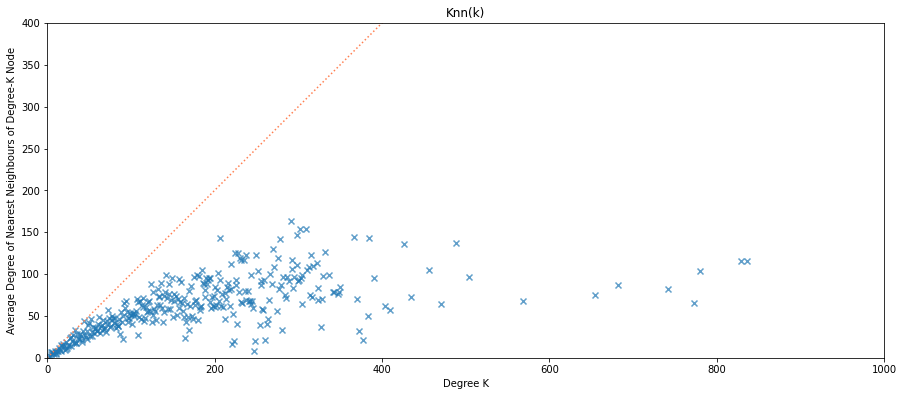

In [11]:
plt.figure(figsize=(15,15))
plt.scatter(knn_df.index, knn_df['KNN'], marker='x', alpha=0.7)
plt.xlim(0, 1000)
plt.ylim(0, 400)
plt.xlabel("Degree K")
plt.ylabel("Average Degree of Nearest Neighbours of Degree-K Node")
plt.plot([0, 1000], [0,1000], color='coral', linestyle=':') 
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Knn(k)")

The result above suggests that the network is weakly disassortative with knn(k) below the degree of k. We calculate assortativity of the graph to verify.

In [12]:
print(nx.degree_assortativity_coefficient(G))


-0.004799766084608569


Indeed the degree assortativity coefficient is below 0 and suggests that the network is weakly disassortative.

array([[<AxesSubplot:title={'center':'PR'}>]], dtype=object)

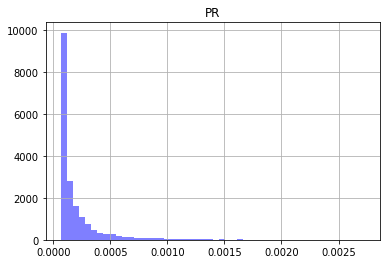

In [14]:
# PageRank
pagerank_dict = nx.pagerank(G)
pagerank_df = pd.DataFrame.from_dict(pagerank_dict,orient='index',columns=['PR'])
pagerank_df.hist(bins=50,histtype='bar', density=True, color='blue', alpha=0.5)

array([[<AxesSubplot:title={'center':'Betweenness Centrality'}>]],
      dtype=object)

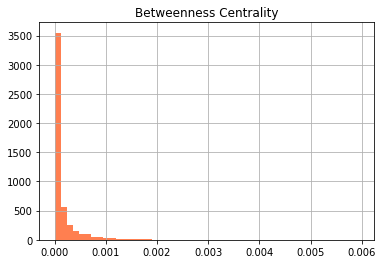

In [15]:
# betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['Betweenness Centrality'])
betweenness_df.hist(bins=50, color='coral')

array([[<AxesSubplot:title={'center':'Degrees'}>]], dtype=object)

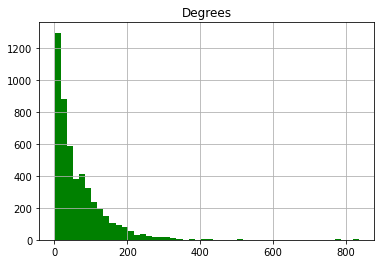

In [16]:
# node degrees
degrees = dict(G.degree())
degree_df = pd.DataFrame.from_dict(degrees, orient='index', columns=['Degrees'])
degree_df.hist(bins=50, color='green')

array([[<AxesSubplot:title={'center':'Weighted Degrees'}>]], dtype=object)

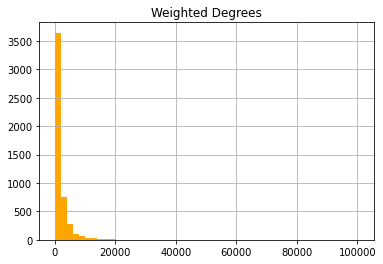

In [17]:
# weighted degrees
weighted_degrees = dict(G.degree(weight='weight'))
weighted_degree_df = pd.DataFrame.from_dict(weighted_degrees, orient='index', columns=['Weighted Degrees'])
weighted_degree_df.hist(bins=50, color='orange')

In [18]:
# concatenate all df
graph_df = pd.concat([degree_df, weighted_degree_df, pagerank_df, betweenness_df], axis=1)
graph_df.head()

Degrees  Weighted Degrees        PR  Betweenness Centrality
91099      131              1786  0.000067            0.000000e+00
92091       69               736  0.000068            2.651806e-07
83059      193              2125  0.000161            6.626757e-04
84159       85               937  0.000111            1.615936e-04
92249      164              2830  0.000185            6.376720e-04

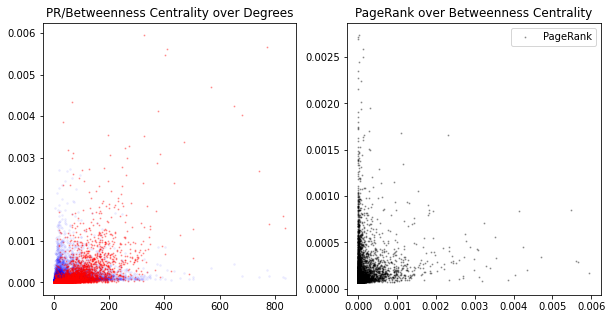

In [19]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
ax[0].scatter(graph_df['Degrees'], graph_df['PR'], c='blue', alpha=0.05, s=3, label='PageRank')
ax[0].scatter(graph_df['Degrees'], graph_df['Betweenness Centrality'], c='r', alpha=0.3, s=1, label='Betweenness Centrality')
# ax[0].scatter(graph_df['Degrees'], graph_df['Weighted Degrees'], c='g', alpha=0.3, s=1)
ax[0].set_title("PR/Betweenness Centrality over Degrees") 

ax[1].scatter(graph_df['Betweenness Centrality'], graph_df['PR'], c='k', alpha=0.3, s=1, label='PageRank')
ax[1].set_title("PageRank over Betweenness Centrality")
plt.legend()
plt.show()


## Community Detection
Community Detection is frequently used in spatial networks to identify spatial clusters in the network that could correspond to e.g. administrative regions. There are many algorithms to identify communities. Some of the common ones include Girvan-Newman, Louvain's Modularity, Label Propagation and so on. With a large-size network the process may take long. Here we generate a random small-size network for demonstration.

In [20]:
# apply Girvan-Newman algorithm
sample_g = nx.karate_club_graph()
gm_communities = nx.algorithms.community.girvan_newman(sample_g)
top_comm = next(gm_communities)
sorted(map(sorted, top_comm))

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

In [21]:
# apply greedy algorithm to detect community
greedy_comms = nx.algorithms.community.greedy_modularity_communities(sample_g)
greedy_comms

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

In [25]:
# one common algorithm used in spatial network is Louvains' Modularity. It can be generated by another package Community
import community as community_louvain
# convert DiGraph to undirected
undirected_G = G.to_undirected()
louvain_comms = community_louvain.best_partition(undirected_G, weight='weight')

In [43]:
louvain_df = pd.DataFrame([(k, v) for k, v in louvain_comms.items()], columns=['NodeID', 'LouvainCommunity'])
louvain_df.head()

NodeID  LouvainCommunity
0  91099                 2
1  92091                 2
2  83059                 2
3  84159                 1
4  92249                 2

In [48]:
louvain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4973 entries, 0 to 4972
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NodeID            4973 non-null   object
 1   LouvainCommunity  4973 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.8+ KB


In [31]:
# we now append Louvain Community info to the transit nodes (transit nodes) and illustrate communities spatially
import geopandas
transit_nodes_gdf = geopandas.read_file(r"data/TransitNodes.shp")
transit_nodes_gdf.head()

BUS_STOP_N BUS_ROOF_N                LOC_DESC                     geometry
0      78221        B06                    None  POINT (42227.956 39563.156)
1      63359        B01       HOUGANG SWIM CPLX  POINT (34065.748 39047.458)
2      64141        B13          AFT JLN TELAWI  POINT (36335.296 38525.741)
3      83139        B07        AFT JOO CHIAT PL  POINT (36530.265 32981.180)
4      55231        B02  OPP SBST EAST DISTRICT  POINT (29669.934 40841.514)

In [47]:
transit_nodes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BUS_STOP_N  5040 non-null   object  
 1   BUS_ROOF_N  5038 non-null   object  
 2   LOC_DESC    4921 non-null   object  
 3   geometry    5040 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 157.6+ KB


In [61]:
# join the two dataFrame
transit_nodes_w_comm_gdf = pd.merge(left=transit_nodes_gdf, right=louvain_df, left_on="BUS_STOP_N", right_on='NodeID')
all_graph_gdf = pd.merge(left=transit_nodes_w_comm_gdf, right=graph_df, left_on="BUS_STOP_N", right_index=True)
all_graph_gdf.head()

BUS_STOP_N BUS_ROOF_N                LOC_DESC                     geometry  \
0      78221        B06                    None  POINT (42227.956 39563.156)   
1      63359        B01       HOUGANG SWIM CPLX  POINT (34065.748 39047.458)   
2      64141        B13          AFT JLN TELAWI  POINT (36335.296 38525.741)   
3      83139        B07        AFT JOO CHIAT PL  POINT (36530.265 32981.180)   
4      55231        B02  OPP SBST EAST DISTRICT  POINT (29669.934 40841.514)   

  NodeID  LouvainCommunity  Degrees  Weighted Degrees        PR  \
0  78221                 1       44              1510  0.000190   
1  63359                 9       73               958  0.000095   
2  64141                 9       25               842  0.000103   
3  83139                 2       34               363  0.000214   
4  55231                 4       56               512  0.000234   

   Betweenness Centrality  
0            5.186240e-05  
1            5.162639e-05  
2            2.961209e-07  
3            1.675568e-06  
4            1.874109e-04

We now have a dataframe of all node-based statistics that we have calculated so far. We will map it out with geopandas.

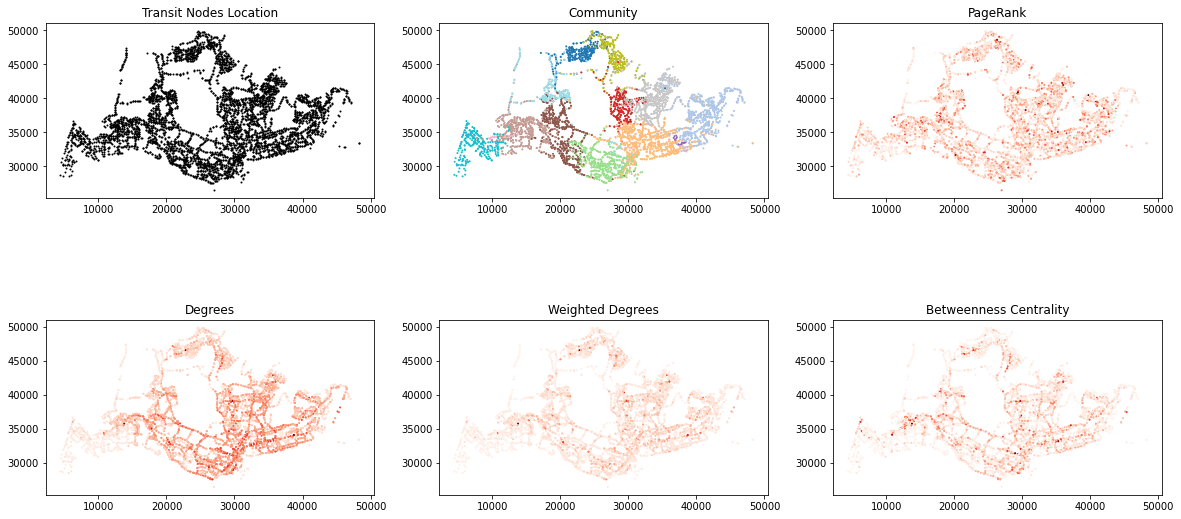

In [91]:
import matplotlib.colors as colors
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
all_graph_gdf.plot(markersize=1, ax=ax[0][0], color='k')
ax[0][0].title.set_text("Transit Nodes Location")
all_graph_gdf.plot(column='LouvainCommunity', markersize=1, cmap="tab20", ax=ax[0][1])
ax[0][1].title.set_text("Community")
all_graph_gdf.plot(column="PR", cmap="Reds", ax=ax[0][2], markersize=1, norm=colors.PowerNorm(gamma=0.5))
ax[0][2].title.set_text("PageRank")
all_graph_gdf.plot(column="Degrees", cmap="Reds", ax=ax[1][0], markersize=1, norm=colors.PowerNorm(gamma=0.5))
ax[1][0].title.set_text("Degrees")
all_graph_gdf.plot(column="Weighted Degrees", cmap="Reds",  ax=ax[1][1], markersize=1, norm=colors.PowerNorm(gamma=0.5))
ax[1][1].title.set_text("Weighted Degrees")
all_graph_gdf.plot(column="Betweenness Centrality", cmap="Reds", ax=ax[1][2], markersize=1, norm=colors.PowerNorm(gamma=0.5))
ax[1][2].title.set_text("Betweenness Centrality")


Results from Louvain's Community Detection algorithm suggest that space has a strong effect in the formation of communities in this case, since most nodes that belong to the same community also tend to be spatially closed to one another, forming somewhat spatially contiguous regions.